Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'BNB'
against_currency = 'USD'

start = dt.datetime(2017,1,1)
end = dt.datetime.now()

base_df = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)
base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-24,0.115841,0.101531,0.115203,0.105870,1.452690e+05,0.105870
2017-07-25,0.109013,0.099266,0.105893,0.105138,2.003950e+05,0.105138
2017-07-26,0.108479,0.100888,0.105108,0.107737,3.444990e+05,0.107737
2017-07-27,0.109019,0.101473,0.107632,0.104067,3.425680e+05,0.104067
2017-07-28,0.111264,0.101108,0.104782,0.107811,3.402180e+05,0.107811
...,...,...,...,...,...,...
2021-06-12,369.058044,331.111938,344.042847,366.648956,2.171880e+09,366.648956
2021-06-13,377.018646,355.310944,365.754700,368.792755,2.271215e+09,368.792755
2021-06-14,379.659851,363.934998,372.736847,373.566162,2.246536e+09,373.566162


In [3]:
base_df['Spread'] = base_df.High - base_df.Low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1420 entries, 2017-07-24 to 2021-06-18
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1420 non-null   float64
 1   Low        1420 non-null   float64
 2   Open       1420 non-null   float64
 3   Close      1420 non-null   float64
 4   Volume     1420 non-null   float64
 5   Adj Close  1420 non-null   float64
 6   Spread     1420 non-null   float64
dtypes: float64(7)
memory usage: 88.8 KB


## Plot the closing value of aave over time

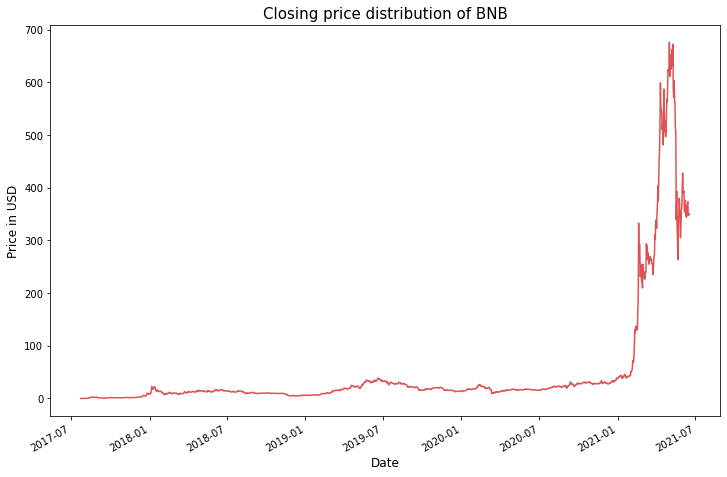

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(y = base_df.Close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of BNB", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
import mplfinance as mpf

#base_df['Date_mpl'] = base_df['Date'].apply(lambda x: mdates.date2num(x))

temp_base_df = base_df.copy(deep=False)
#temp_base_df = temp_base_df.set_index(['Date'])
temp_base_df = temp_base_df.drop(['Spread'], axis=1)
temp_base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-24,0.115841,0.101531,0.115203,0.105870,1.452690e+05,0.105870
2017-07-25,0.109013,0.099266,0.105893,0.105138,2.003950e+05,0.105138
2017-07-26,0.108479,0.100888,0.105108,0.107737,3.444990e+05,0.107737
2017-07-27,0.109019,0.101473,0.107632,0.104067,3.425680e+05,0.104067
2017-07-28,0.111264,0.101108,0.104782,0.107811,3.402180e+05,0.107811
...,...,...,...,...,...,...
2021-06-12,369.058044,331.111938,344.042847,366.648956,2.171880e+09,366.648956
2021-06-13,377.018646,355.310944,365.754700,368.792755,2.271215e+09,368.792755
2021-06-14,379.659851,363.934998,372.736847,373.566162,2.246536e+09,373.566162


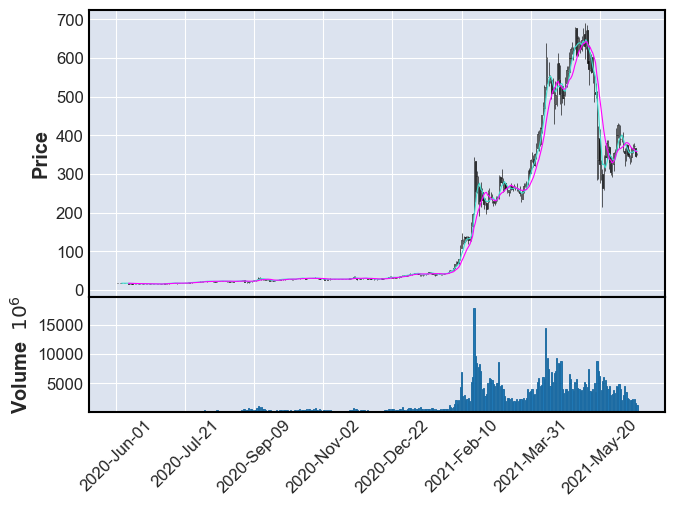

In [19]:
mpf.plot(temp_base_df.loc['2020-6-1':], type='candle', mav=(5,10), volume=True)

In [7]:
#fig = plt.figure(figsize=(12,8))
#ax1 = plt.subplot2grid((1,1), (0,0))

#candlestick_df = aave_df[aave_df['Date']>'2017-05-01']
#ohlc = []
#for ind, row in candlestick_df.iterrows():
#    ol = [row['Date_mpl'],row['Open'], row['High'], row['Low'], row['Close'], row['Volume']]
#    ohlc.append(ol)
    
## candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
#plt.xlabel("Date", fontsize=12)
#plt.ylabel("Price in USD", fontsize=12)
#plt.title("Candlestick chart for Aave", fontsize=15)
#plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
#plt.show()

In [8]:
#aave_df_2 = pd.read_csv('../../resources/prices/coin_Aave.csv', index_col='SNo',parse_dates=['Date'])
#aave_df_2['Date_mpl'] = aave_df_2['Date'].apply(lambda x: mdates.date2num(x))

#fig, ax = plt.subplots(figsize=(12,8))
## sns.lineplot(aave_df_2.Close.values, time=aave_df_2.Date_mpl.values, alpha=0.8, color=color[2], ax=ax)
#ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
#fig.autofmt_xdate()
#plt.xlabel('Date', fontsize=12)
#plt.ylabel('Price in USD', fontsize=12)
#plt.title("Closing price distribution of AAVE", fontsize=15)
#plt.show()

## Future Price Prediction

In [9]:
from fbprophet import Prophet

import data from Yahoo

In [10]:
base_df

,High,Low,Open,Close,Volume,Adj Close,Spread
Date,,,,,,,
2017-07-24,0.115841,0.101531,0.115203,0.105870,1.452690e+05,0.105870,0.014310
2017-07-25,0.109013,0.099266,0.105893,0.105138,2.003950e+05,0.105138,0.009747
2017-07-26,0.108479,0.100888,0.105108,0.107737,3.444990e+05,0.107737,0.007591
2017-07-27,0.109019,0.101473,0.107632,0.104067,3.425680e+05,0.104067,0.007546
2017-07-28,0.111264,0.101108,0.104782,0.107811,3.402180e+05,0.107811,0.010156
...,...,...,...,...,...,...,...
2021-06-12,369.058044,331.111938,344.042847,366.648956,2.171880e+09,366.648956,37.946106
2021-06-13,377.018646,355.310944,365.754700,368.792755,2.271215e+09,368.792755,21.707703
2021-06-14,379.659851,363.934998,372.736847,373.566162,2.246536e+09,373.566162,15.724854


In [25]:
price_predict_df = base_df['Close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-6-1']
price_predict_df

,ds,y
1043,2020-06-02,17.545404
1044,2020-06-03,17.565874
1045,2020-06-04,17.688786
1046,2020-06-05,17.535934
1047,2020-06-06,17.447035
...,...,...
1415,2021-06-12,366.648956
1416,2021-06-13,368.792755
1417,2021-06-14,373.566162
1418,2021-06-15,347.033447


In [29]:
m = Prophet()
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
378,2021-06-21,554.227462,463.356890,650.916153
379,2021-06-22,552.306876,457.741670,654.421599
380,2021-06-23,559.806596,468.966058,651.020853
381,2021-06-24,559.503181,461.030455,651.260415
382,2021-06-25,558.529549,463.640390,657.715406


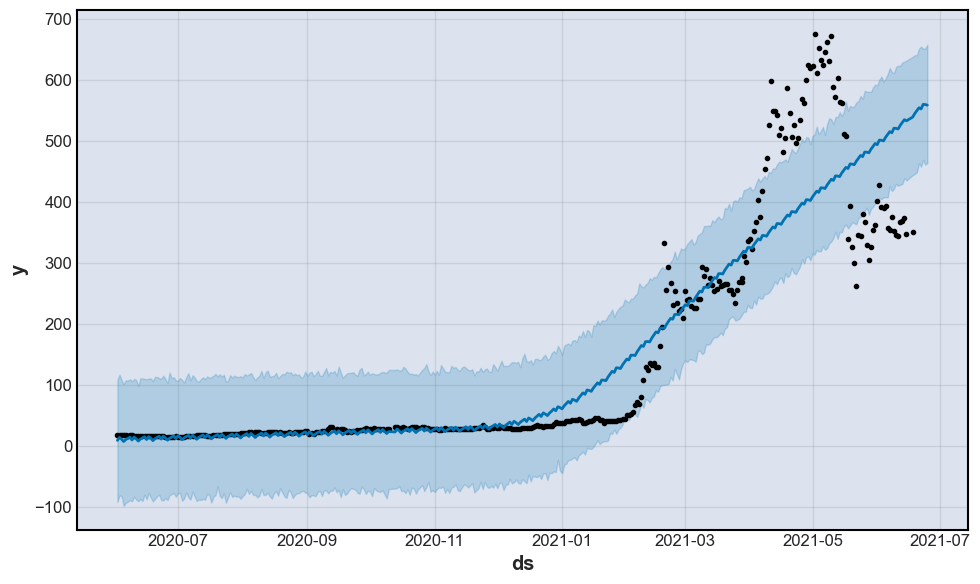

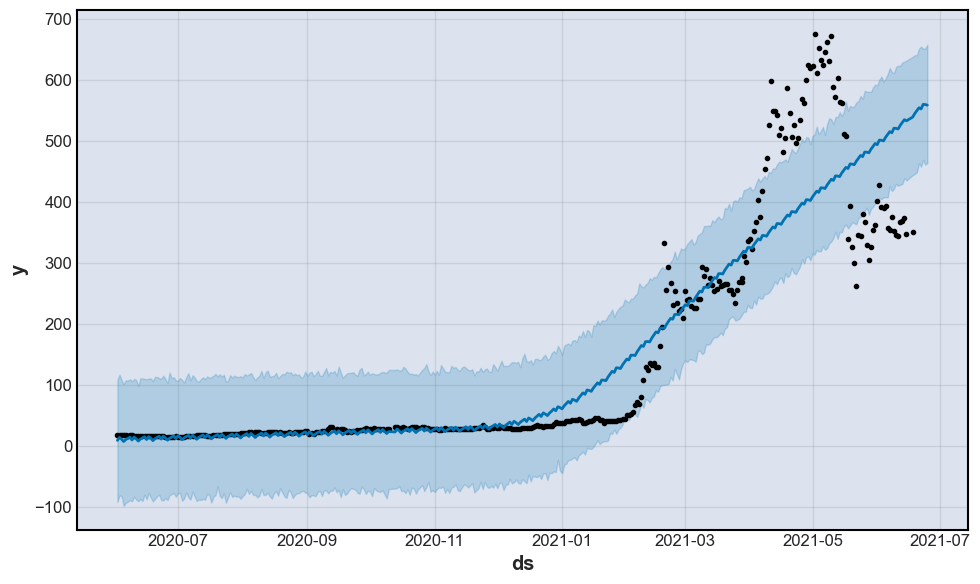

In [30]:
m.plot(forecast)

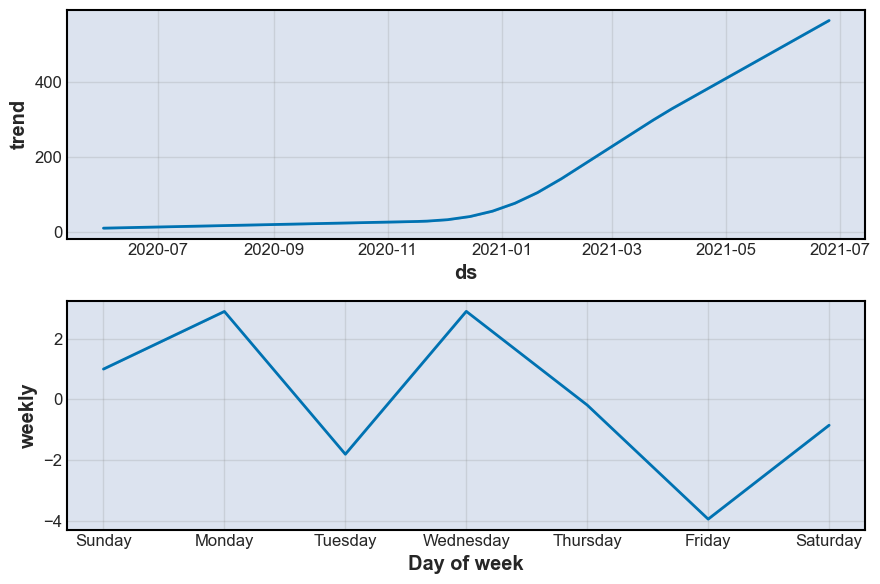

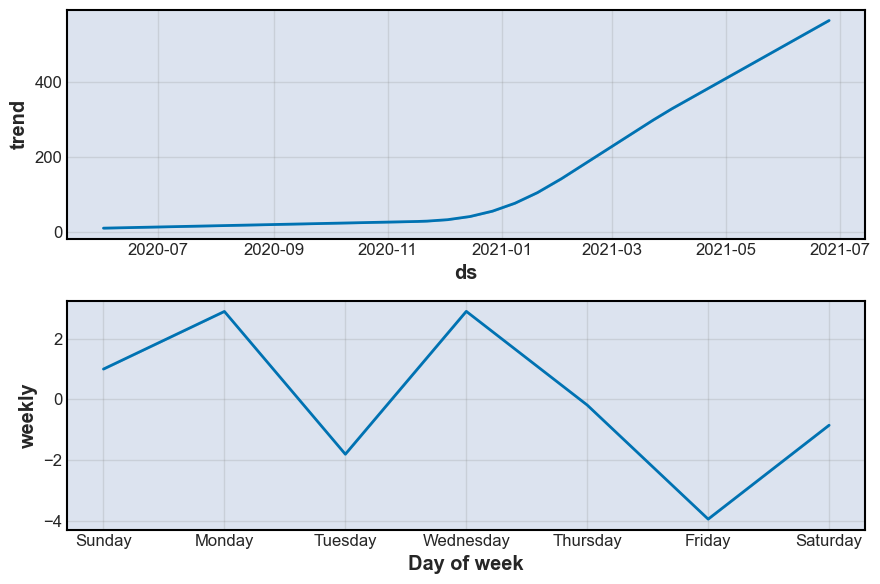

In [31]:
m.plot_components(forecast)